In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Reshape

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

In [3]:
x_train, x_test = x_train/255, x_test/255

In [5]:
class AutoEncoder(Model):
    def __init__(self, latentDim):
        super().__init__()
        self.latentDim = latentDim
        
        self.encoder = tf.keras.Sequential([
            Flatten(),
            Dense(self.latentDim, activation="relu")
        ])
        
        self.decoder = tf.keras.Sequential([
            Dense(784, activation="sigmoid"),
            Reshape((28,28))
        ])
        
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [6]:
autoEncoder = AutoEncoder(64)

In [7]:
autoEncoder.compile(optimizer="adam", loss=tf.keras.losses.MeanSquaredError())

In [8]:
autoEncoder.fit(x_train, x_train, epochs=5, shuffle=True, 
                validation_data=(x_test, x_test))

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0238 - val_loss: 0.0131
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0115 - val_loss: 0.0106
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0101 - val_loss: 0.0097
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0095 - val_loss: 0.0094
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0092 - val_loss: 0.0092


In [9]:
encoded_images = autoEncoder.encoder(x_test).numpy()
decoded_images = autoEncoder.decoder(encoded_images).numpy()

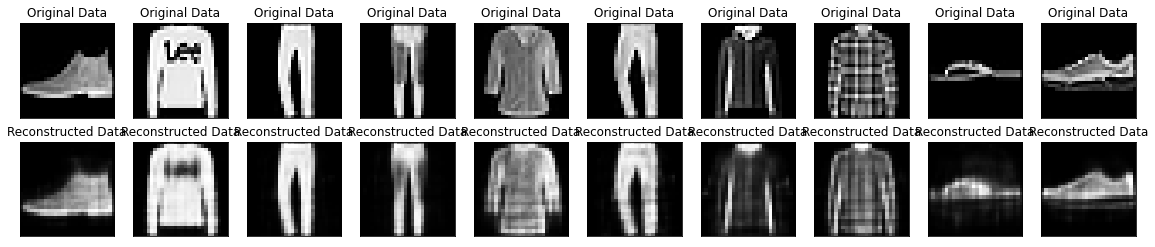

In [16]:
n = 10
plt.figure(figsize=(20,4))

for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.title("Original Data")
    plt.imshow(x_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i+1+n)
    plt.title("Reconstructed Data")
    plt.imshow(decoded_images[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()